In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [31]:
# Carga de datos
data=pd.read_csv("../files/input/shipping-data.csv")

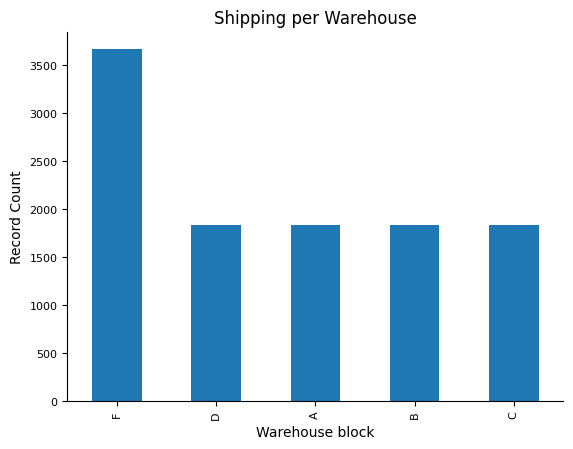

In [37]:
# Visual for Shipping per Warehouse
def create_visual_for_shiping_per_warehouse(data):
    data=data.copy()
    plt.figure()
    counts= data.Warehouse_block.value_counts()
    counts.plot.bar(
        title="Shipping per Warehouse",
        xlabel="Warehouse block",
        ylabel="Record Count",
        color="tab:blue",
        fontsize=8,
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    
    
    
    os.makedirs("../docs", exist_ok=True)
    plt.savefig("../docs/shipping_per_warehouse.png")

create_visual_for_shiping_per_warehouse(data)

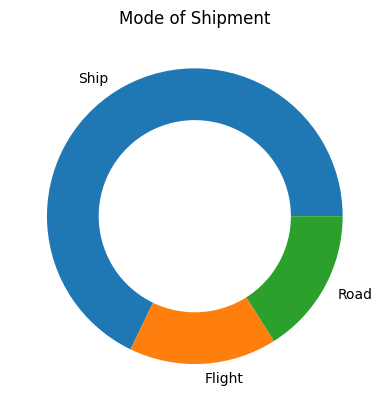

In [38]:
# Visual for Modelo of Shipment

def create_visual_for_mode_of_shipment(data):
    data=data.copy()
    plt.figure()
    counts=data.Mode_of_Shipment.value_counts()
    counts.plot.pie(
        title="Mode of Shipment",
        wedgeprops=dict(width=0.35),
        ylabel="",
        colors=["tab:blue","tab:orange","tab:green"],
    )
    plt.savefig("../docs/mode_of_shipment.png")
    
create_visual_for_mode_of_shipment(data)

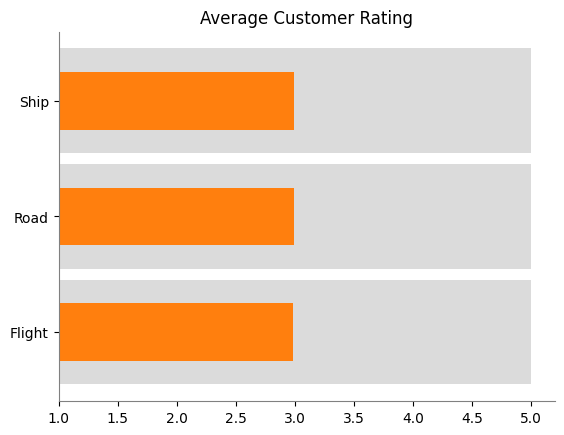

In [39]:
# Visual for average custumer rating
def create_visual_for_average_customer_rating(data):
    data=data.copy()
    plt.figure()
    data=(data[["Mode_of_Shipment","Customer_rating"]]
        .groupby("Mode_of_Shipment")
        .describe())
    data.columns =data.columns.droplevel()
    data=data[["mean","min","max"]]
    plt.barh(
        y=data.index.values,
        width=data["max"].values-1,
        left=data["min"].values,
        height=0.9,
        color="lightgray",
        alpha=0.8,
    )
    colors=["tab:green" if value >= 3.0 else "tab:orange" for value in data["mean"].values]
    plt.barh(
        y=data.index.values,
        width=data["mean"].values - 1,
        left=data["min"].values,
        color=colors,
        height=0.5,
        alpha=1.0,
    )
    plt.title("Average Customer Rating")
    plt.gca().spines["left"].set_color("gray")
    plt.gca().spines["bottom"].set_color("gray")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig("../docs/average_customer_rating.png")

create_visual_for_average_customer_rating(data)


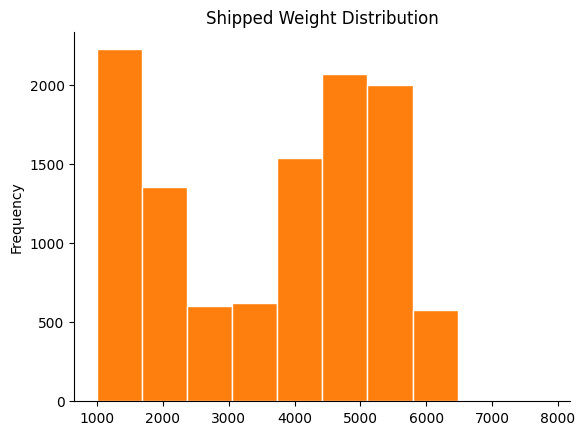

In [40]:
# Visual for Weight Distribution
def create_visual_for_weight_distribution(data):
    data=data.copy()
    plt.figure()
    data.Weight_in_gms.plot.hist(
        title="Shipped Weight Distribution",
        color="tab:orange",
        edgecolor="white",
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig("../docs/weight_distribution.png")
    

create_visual_for_weight_distribution(data)

%%writefile index.html
<!DOCTYPE html>
<html>
    <body>
        <h1>Shipping Dashboard Example</h1>
        <div style="width:45%;float:left">
            <img src="shipping_per_warehouse.png" alt="Fig 1">
            <img src="mode_of_shipment.png" alt="Fig 2">
        </div>
        <div style="width:45%;float:left">
            <img src="average_customer_rating.png" atc="Fig 3">
            <img src="weight_distribution.png" alt="Fig 4">
        </div>
    </body>
</html>